In [1]:
import yaml

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
with open("config.yaml", "r") as f:
    cfg = yaml.safe_load(f)

In [3]:
df = pd.read_csv(cfg["dataset"])
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

In [5]:
df.replace('-', np.nan, inplace=True)
df.isna().sum()

Brand                   1
Year                    1
Model                   1
Car/Suv                28
Title                   1
UsedOrNew               1
Transmission          252
Engine               1675
DriveType               1
FuelType              638
FuelConsumption      1698
Kilometres            143
ColourExtInt            1
Location              450
CylindersinEngine    1675
BodyType              282
Doors                1604
Seats                1705
Price                   3
dtype: int64

In [6]:
df["Price"] = pd.to_numeric(df["Price"], errors='coerce').astype('Int64')
df = df.dropna(subset=['Price'], axis=0)
df.isna().sum()

Brand                   0
Year                    0
Model                   0
Car/Suv                26
Title                   0
UsedOrNew               0
Transmission          243
Engine               1658
DriveType               0
FuelType              632
FuelConsumption      1681
Kilometres            126
ColourExtInt            0
Location              449
CylindersinEngine    1658
BodyType              279
Doors                1587
Seats                1688
Price                   0
dtype: int64

In [7]:
df["Year"] = df["Year"].astype(int)
df["Engine"] = df["Engine"].str.extract(r'(\d+(\.\d+)?)\s*L')[0].astype(np.float64)
df.rename(columns={"Engine": "EngineVol"}, inplace=True)
df["FuelConsumption"] = df["FuelConsumption"].str.extract(r'(\d+(\.\d+)?)\s*L\s')[0].astype(np.float64)
df["Kilometres"] = pd.to_numeric(df["Kilometres"], errors='coerce').astype('Int64')
df[["ColorExt", "ColorInt"]] = df["ColourExtInt"].str.extract(r'(\w+)\s*/\s*(\w+)')
df.drop(columns="ColourExtInt", inplace=True)
df.replace('-', np.nan, inplace=True)
df["CylindersinEngine"] = df["CylindersinEngine"].str.extract(r'(\d+)\s').astype('Int64')
df["Doors"] = df["Doors"].str.extract(r'(\d+)\s')[0].astype('Int64')
df["Seats"] = df["Seats"].str.extract(r'(\d+)\s')[0].astype('Int64')
df["Price"] = df["Price"].astype(int)
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,EngineVol,DriveType,FuelType,FuelConsumption,Kilometres,Location,CylindersinEngine,BodyType,Doors,Seats,Price,ColorExt,ColorInt
0,Ssangyong,2022,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,2.2,AWD,Diesel,8.7,5595,"Caringbah, NSW",4,SUV,4,7,51990,White,Black
1,MG,2022,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,1.5,Front,Premium,6.7,16,"Brookvale, NSW",4,Hatchback,5,5,19990,Black,Black
2,BMW,2022,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,2.0,Rear,Premium,6.6,8472,"Sylvania, NSW",4,Coupe,2,4,108988,Grey,White
3,Mercedes-Benz,2011,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,5.5,Rear,Premium,11.0,136517,"Mount Druitt, NSW",8,Coupe,2,4,32990,White,Brown
4,Renault,2022,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,1.3,Front,Unleaded,6.0,1035,"Castle Hill, NSW",4,SUV,4,5,34990,Grey,Black


In [8]:
df[df['Car/Suv'].isnull() == True]

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,EngineVol,DriveType,FuelType,FuelConsumption,Kilometres,Location,CylindersinEngine,BodyType,Doors,Seats,Price,ColorExt,ColorInt
14845,Mini,2023,Countryman,NaN,2023 Mini Countryman Cooper Mini Yours,NEW,NaN,1.5,Front,Premium,6.3,<NA>,NaN,3,SUV,5,5,56600,years,Unlimited
14957,Citroen,2023,C5,NaN,2023 Citroen C5 Aircross Sport 1.6 THP 133,NEW,NaN,1.6,Front,NaN,5.7,<NA>,NaN,4,SUV,5,5,54990,years,Unlimited
15000,Mini,2023,Convertible,NaN,2023 Mini Convertible Cooper Classic,NEW,NaN,1.5,Front,Premium,6.0,<NA>,NaN,3,Convertible,2,4,43680,years,Unlimited
15035,Audi,2023,A4,NaN,2023 Audi A4 Allroad 40 TDI Quattro,NEW,NaN,2.0,AWD,Diesel,4.9,<NA>,NaN,2,Wagon,4,5,78000,years,Unlimited
15056,Porsche,2023,Taycan,NaN,2023 Porsche Taycan 4S Cross Turismo,NEW,NaN,0.0,AWD,Electric,0.0,<NA>,NaN,0,Wagon,4,4,209600,years,Unlimited
15058,Porsche,2023,Taycan,NaN,2023 Porsche Taycan Turbo S,NEW,NaN,0.0,AWD,Electric,0.0,<NA>,NaN,0,Sedan,4,4,352600,years,Unlimited
15065,Mini,2023,Countryman,NaN,2023 Mini Countryman Cooper S JCW Sport,NEW,NaN,2.0,Front,Premium,6.7,<NA>,NaN,4,SUV,5,5,61900,years,Unlimited
15109,Lexus,2023,LS500H,NaN,2023 Lexus LS500H (hybrid) Sports LUX Black Tr...,NEW,NaN,3.5,Rear,Hybrid,6.6,<NA>,NaN,6,Sedan,4,5,201040,years,100
15115,Lexus,2023,ES300H,NaN,2023 Lexus ES300H F Sport (hybrid),NEW,NaN,2.5,Front,Hybrid,4.8,<NA>,NaN,4,Sedan,4,5,73290,years,100
15130,Peugeot,2023,Expert,NaN,2023 Peugeot Expert PRO Long,NEW,NaN,2.0,Front,Diesel,6.3,<NA>,NaN,4,Commercial,4,3,50075,years,200


In [12]:
df[df.applymap(lambda x: 'GWM' in str(x))].stack()

C:\Users\Qolorer\AppData\Local\Temp\ipykernel_9400\149789788.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[df.applymap(lambda x: 'GWM' in str(x))].stack()


833    Brand                                 GWM
       Car/Suv                     Dominelli GWM
       Title      2023 GWM Tank 300 Ultra Petrol
1029   Brand                                 GWM
       Car/Suv                     Dominelli GWM
                               ...              
16604  Brand                                 GWM
       Car/Suv              Springwood GWM HAVAL
       Title             2023 GWM Haval Jolion S
16670  Brand                                 GWM
       Title         2022 GWM Haval H6 Ultra AWD
Length: 492, dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16681 entries, 0 to 16733
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16681 non-null  object 
 1   Year               16681 non-null  int32  
 2   Model              16681 non-null  object 
 3   Car/Suv            16655 non-null  object 
 4   Title              16681 non-null  object 
 5   UsedOrNew          16681 non-null  object 
 6   Transmission       16438 non-null  object 
 7   EngineVol          15022 non-null  float64
 8   DriveType          16681 non-null  object 
 9   FuelType           16049 non-null  object 
 10  FuelConsumption    15000 non-null  float64
 11  Kilometres         16106 non-null  Int64  
 12  Location           16232 non-null  object 
 13  CylindersinEngine  15023 non-null  Int64  
 14  BodyType           16402 non-null  object 
 15  Doors              15094 non-null  Int64  
 16  Seats              14993 no

In [62]:
df_num = df.select_dtypes(exclude=["object"])
df_cat = df.select_dtypes(include=["object"])

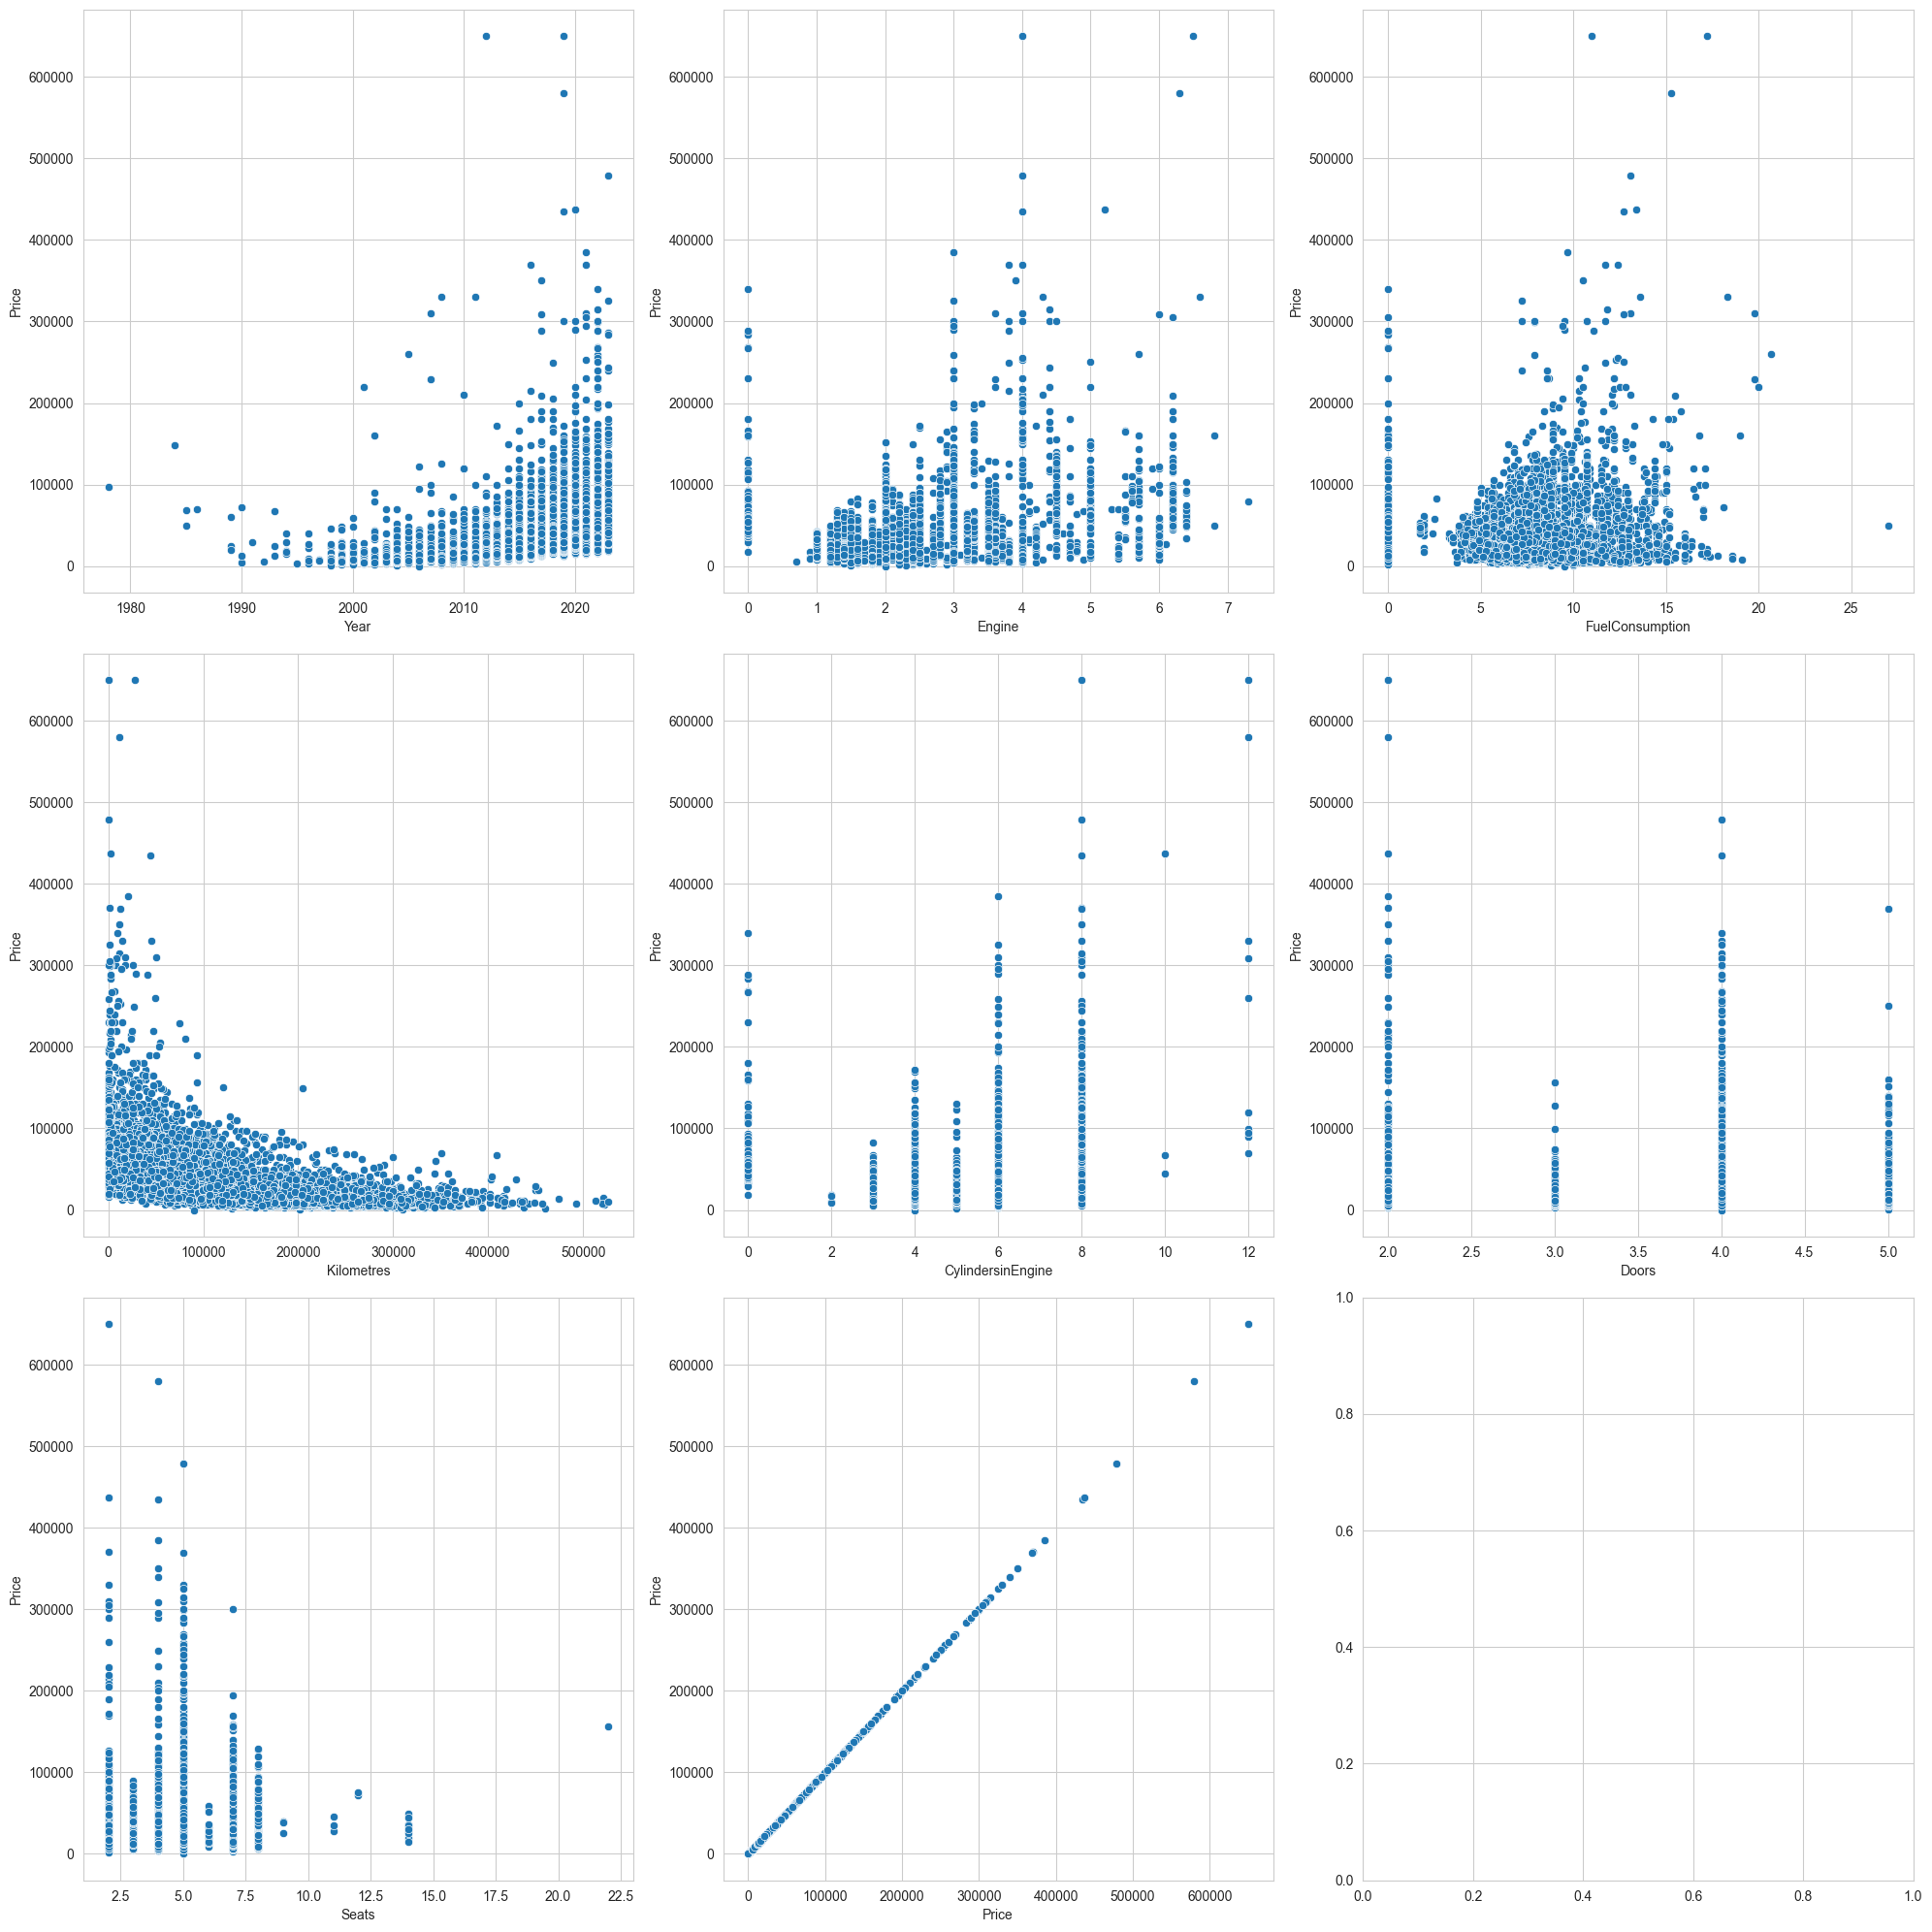

In [64]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
axes_flattened = axes.reshape(-1)
for i in range(len(df_num.columns)):
    ax = axes_flattened[i]
    sns.scatterplot(
        x=df_num.iloc[:, i],
        y="Price",
        data=df_num.dropna(),
        ax=ax,
    )
fig.tight_layout(pad=1.0)

In [13]:
df['Price'].describe()

count    1.668100e+04
mean     3.730333e+04
std      3.717787e+04
min      8.800000e+01
25%      1.899900e+04
50%      2.950000e+04
75%      4.399000e+04
max      1.500000e+06
Name: Price, dtype: float64

<Axes: >

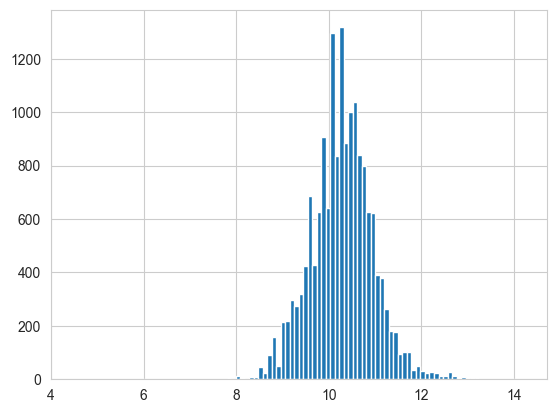

In [16]:
df['Price'].apply("log").hist(bins=100)

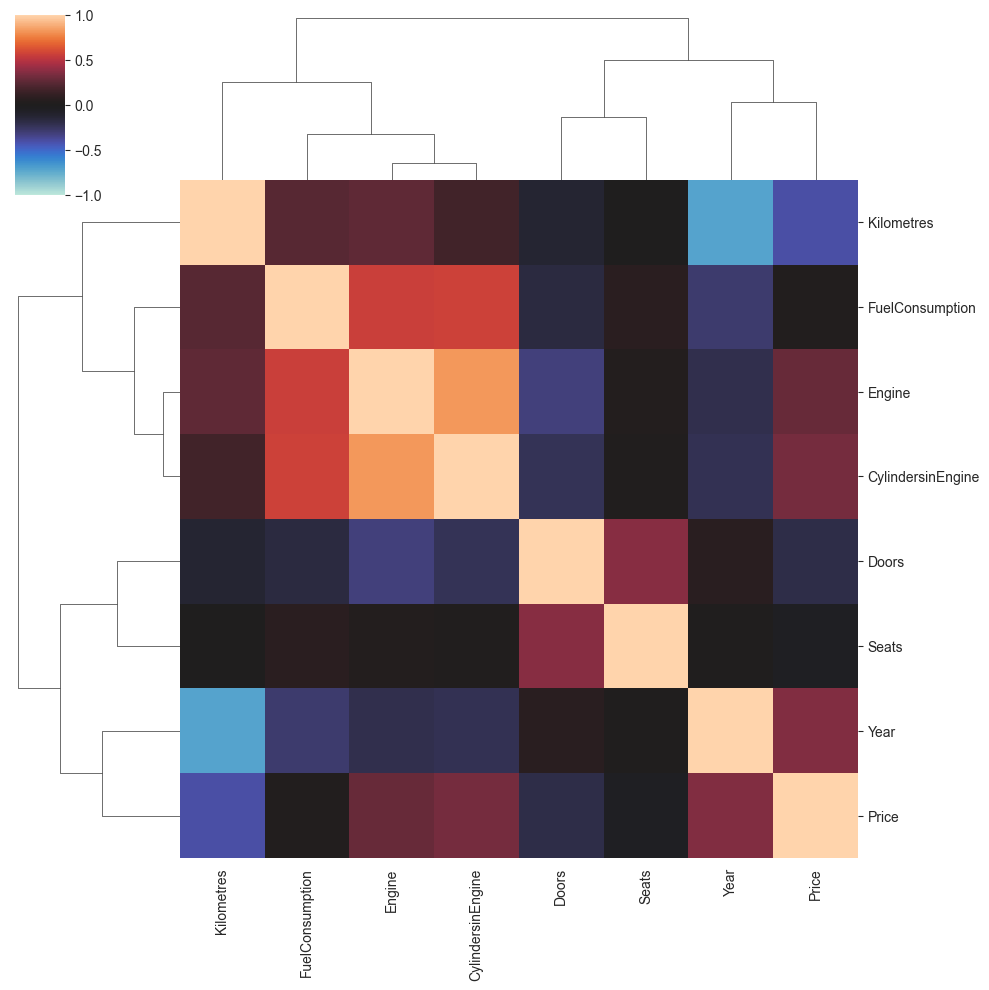

In [65]:
def corr_plot(df: pd.DataFrame, method: str = "pearson", annot: bool = True, **kwargs) -> None:
    sns.clustermap(
        df.corr(method),
        vmin=-1.0,
        vmax=1.0,
        cmap="icefire",
        method="complete",
        annot=annot,
        **kwargs,
    )

corr_plot(df_num, annot=None)